In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../gempy")

import gempy as gp
# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports

import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

In [2]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'serif',
              'transition': 'slide',
              'start_slideshow_at': 'selected',
              'scroll': True,
})

{'scroll': True,
 'start_slideshow_at': 'selected',
 'theme': 'serif',
 'transition': 'slide'}

In [3]:
# Loading the data
geo_data = gp.create_data([-10,30,-10,20,-10,0],[50,50,50],
                         path_f = "paper_Foliations.csv",
                         path_i = "paper_Points.csv")
geo_data.interface_add(X=10, Y=4, Z=-7, formation='fault1')

geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'Layer1', 'Z_std', 2)
geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'Layer2', 'Z_std', 2)


,X,Y,Z,formation,series,order_series,isFault,formation_number,annotations,Z_std
0,4.345153,5.0,-1.921564,fault1,Default serie,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",NaN
1,10.000000,4.0,-7.000000,fault1,Default serie,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",NaN
2,2.303022,5.0,-1.647248,Unconformity,Default serie,1,False,2,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",NaN
3,1.083840,5.0,-1.738687,Unconformity,Default serie,1,False,2,"${\bf{x}}_{\alpha \,{\bf{2}},1}$",NaN
4,8.825648,5.0,-3.140747,Unconformity,Default serie,1,False,2,"${\bf{x}}_{\alpha \,{\bf{2}},2}$",NaN
5,15.561631,5.0,-3.232185,Unconformity,Default serie,1,False,2,"${\bf{x}}_{\alpha \,{\bf{2}},3}$",NaN
6,2.211584,5.0,-5.518153,Layer1,Default serie,1,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},0}$",2.0
7,11.172574,5.0,-6.981171,Layer1,Default serie,1,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},1}$",2.0
8,15.104438,5.0,-8.108915,Layer1,Default serie,1,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},2}$",2.0
9,2.059186,5.0,-4.908561,Layer2,Default serie,1,False,4,"${\bf{x}}_{\alpha \,{\bf{4}},0}$",2.0


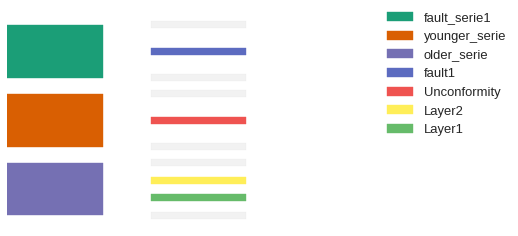

In [4]:
gp.set_series(geo_data, {'fault_serie1': 'fault1','younger_serie' : 'Unconformity', 'older_serie': ('Layer1', 'Layer2')},
              order_formations= ['fault1', 'Unconformity', 'Layer2', 'Layer1'], verbose=2)

geo_data.interface_modify(9, Z = -6.4)

fig=plt.gcf()
#fig.savefig('doc/figs/fault_p.png')

In [5]:
# Choosing just the series without any fault or unconforimity
geo_data = gp.select_series(geo_data, ['older_serie'])

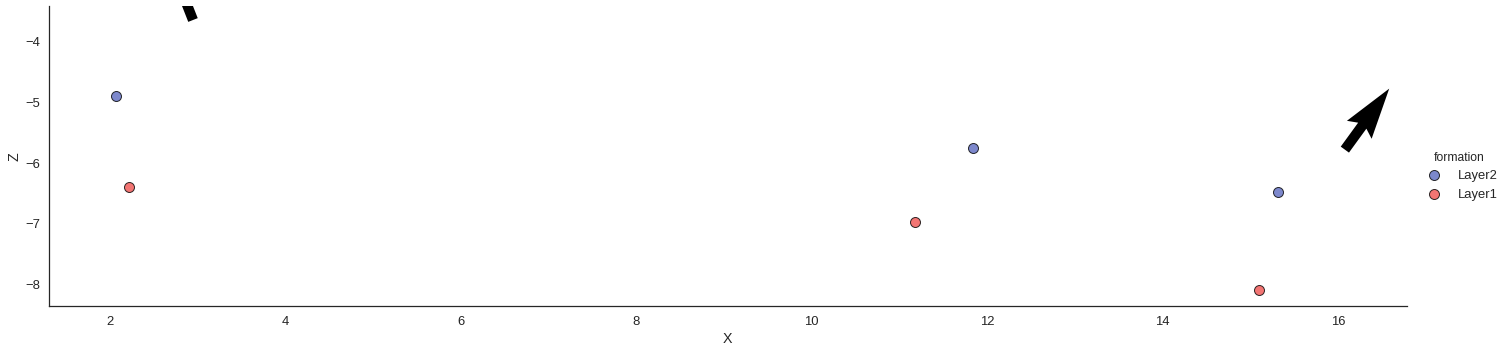

In [6]:
gp.plot_data(geo_data)

In [7]:
# import theano.tensor as T
# T.nonzero_values?

In [8]:
#geo_data = gp.select_series(geo_data, ['fault_serie1', 'older_serie'])
#geo_data = gp.select_series(geo_data, ['fault_serie1', 'younger_serie'])
#geo_data = gp.select_series(geo_data, ['younger_serie', 'older_serie'])
#geo_data = gp.select_series(geo_data, ['fault_serie1'])

In [9]:
# Checking that works
interp_data = gp.InterpolatorInput(geo_data, u_grade=[3, 3, 3], dtype='float64', verbose=[])

Level of Optimization:  fast_run
Device:  cpu
Precision:  float64


In [10]:
lith, fault = gp.compute_model(interp_data)


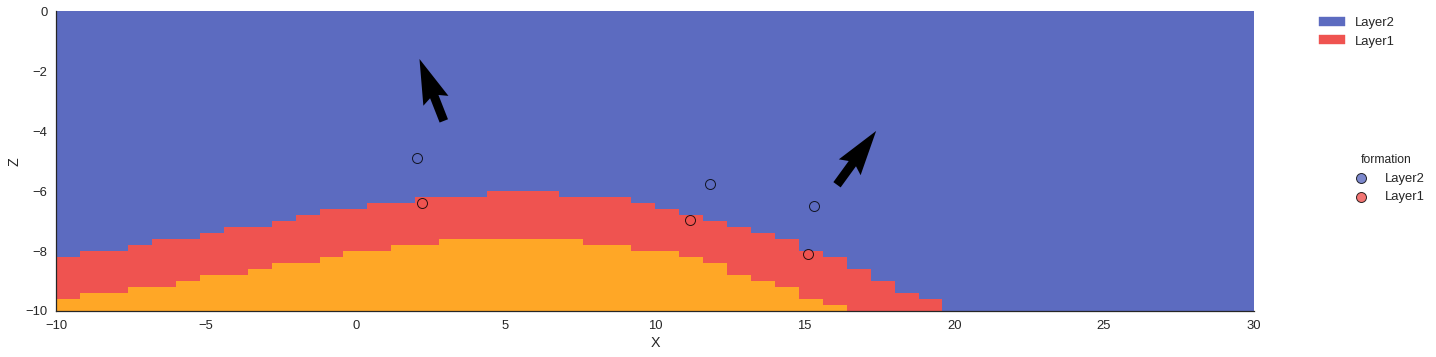

In [11]:
# Plot section
gp.plot_section(geo_data, lith[0], 5, plot_data=True)

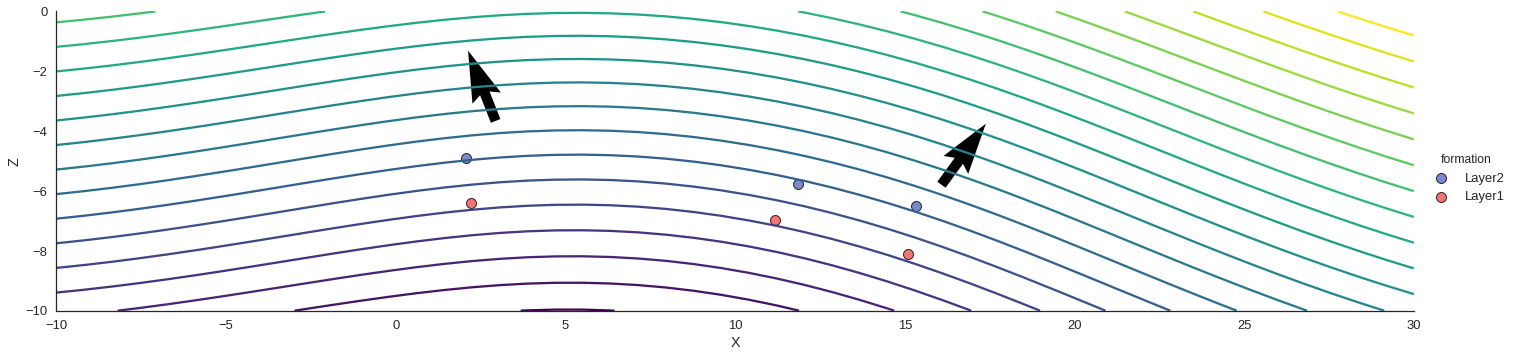

In [12]:
# Plot potential field
gp.plot_potential_field(geo_data, lith[1], 5, plot_data=True, cmap='viridis')
#plt.savefig('doc/figs/SimpleField.png')


In [13]:
ver_s, sim_s = gp.get_surfaces(interp_data,lith[1],
                               None,
                               original_scale=True)

In [14]:
gp.plot_surfaces_3D(geo_data, ver_s, sim_s)

## Gravity

In [28]:
# For computing gravity we need to choose the flag output gravity
interp_data = gp.InterpolatorInput(geo_data, dtype='float64', verbose=[],  output='gravity')


Level of Optimization:  fast_run
Device:  cpu
Precision:  float64


In [29]:
# After compoling we need to set so
gp.set_geophysics_obj(interp_data,  [0.1,19.9,.1,.9, -10, 0], # Extent
                                             [1,1], ) # Resoluion of the measurement

In [30]:
# Now we compute the distances and the component z from the points where we want to compute gravity (in this case just 1 pixel)
# To all the voxels within a range
# This function also works to change the values of each rock type to densities
gp.precomputations_gravity(interp_data, 1, [2.92, 3.1, 2.61]) 

(array([[  1.77158983e-05,   9.95589900e-06,   2.14880070e-06, ...,
           1.77159027e-05,   9.95590149e-06,   2.14880124e-06]]),
 array([False, False, False, ..., False, False, False], dtype=bool))

In [31]:
# Now the function also return the gravity
lith, fault, gravity = gp.compute_model(interp_data, output='gravity')

In [32]:
gravity

array([ 22.78536742])

In [33]:
grav = gp.compute_model(interp_data, 'gravity')


(-2, 12)

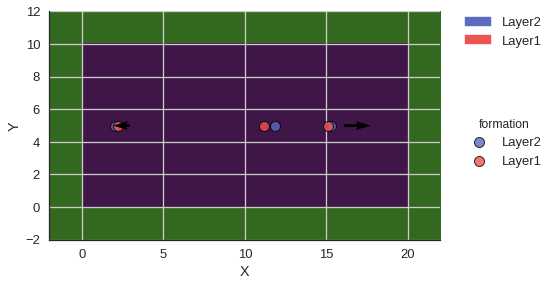

In [34]:
# Here we can plot the model and the gravity. Because we are doing just one voxel the image is not too sexy
gp.plot_section(geo_data, lith[-1], 5, direction='z',plot_data=True)

plt.grid()
fig = plt.gcf()
ax = plt.gca()
ax.imshow([gravity], cmap='viridis', origin='lower', alpha=0.8, extent=[0,20,0,10])
plt.xlim(-2,22)
plt.ylim(-2,12)


### Doing this stochastically


In [35]:
import pymc
interface_Z_stoch = []
foliations_dip_stoch = []
foliations_azimuth_stoch = []

# We rescale the standard deviation
# std = 20./interp_data.rescaling_factor

# loop over the unique group id's and create a pymc.Normal distribution for each
for ind, i in interp_data.geo_data_res.interfaces.iterrows():
    stoch = pymc.Normal(i['formation']+str(ind)+'_stoch', i['Z'], 1./i['Z_std']**2)
    interface_Z_stoch.append(stoch)


In [36]:
import copy
# First we extract from our original intep_data object the numerical data that is necessary for the interpolation.
# geo_data_stoch is a pandas Dataframe

# This is the inital model so it has to be outside the stochastic frame
geo_data_stoch_init = copy.deepcopy(interp_data_g.geo_data_res)

In [37]:
# Insert stochastic parameters to the input data. This are the prior we have to store

@pymc.deterministic(trace=True)
def input_data(value = 0, 
               interface_Z_modifier = interface_Z_stoch,
               geo_data_stoch_init = geo_data_stoch_init,
         
               verbose=0):
    # First we extract from our original intep_data object the numerical data that is necessary for the interpolation.
    # geo_data_stoch is a pandas Dataframe
    geo_data_stoch = gp.get_data(geo_data_stoch_init, numeric=True)

    geo_data_stoch.xs('interfaces')['Z'] = np.array(interface_Z_modifier)
  
    if verbose > 0:
        print(geo_data_stoch)
        
    # then return the input data to be input into the modeling function. Due to the way pymc2 stores the traces
    # We need to save the data as numpy arrays
    return [geo_data_stoch.xs('interfaces')[["X", "Y", "Z"]].values, geo_data_stoch.xs('foliations').values]

In [51]:
# Computing the model and the gravity

@pymc.deterministic(trace=False)
def gempy_model(value=0,
                input_data=input_data, verbose=False):

    # modify input data values accordingly
    interp_data.geo_data_res.interfaces[["X", "Y", "Z"]] = input_data[0]

    # Gx, Gy, Gz are just used for visualization. The theano function gets azimuth dip and polarity!!!
    interp_data.geo_data_res.foliations[["G_x", "G_y", "G_z", "X", "Y", "Z", 'azimuth', 'dip', 'polarity']] = input_data[1]

    try:
        # try to compute model
        lb, fb, grav = gp.compute_model(interp_data, output='gravity')
        if False:
            gp.plot_section(interp_data.geo_data_res, lb[0], 19, plot_data=True)
           # gp.plot_data(interp_data.geo_data_res, direction='y')

        return lb, fb, grav

    except np.linalg.linalg.LinAlgError as err:
        # if it fails (e.g. some input data combinations could lead to
        # a singular matrix and thus break the chain) return an empty model
        # with same dimensions (just zeros)
        if verbose:
            print("Exception occured.")
        return np.zeros_like(lith_block), np.zeros_like(fault_block), np.zeros_like(grav_block)

# We want to store the value of gravity but the models better not. The following chunck is only for that
@pymc.deterministic(trace=True)
def gravity(value=0, model=gempy_model):
    return model[2]

# This is a hack to force to compute the models
@pymc.stochastic(trace=True)
def nothing(value=0, gravity=gravity):
    return 1



In [50]:
np.log(np.inf)

inf

In [52]:
# Choosing the parameters which play a role
np.random.seed(123456) # I think with this is enough to draw always the same priors to be able to compare several resolutions but check the results to be sure!

p_model = pymc.Model([*interface_Z_stoch, input_data, gempy_model, gravity, nothing])

In [53]:
S = pymc.MCMC(input=p_model, db="hdf5", dbname="the_name")
S.use_step_method(pymc.AdaptiveMetropolis, [*interface_Z_stoch, input_data, gempy_model, gravity, nothing], delay=1000)

In [54]:
# Sampling
S.sample(15000, burn=1000, tune_interval=1000)

 [                  1%                  ] 181 of 15000 complete in 14.3 secHalting at iteration  181  of  15000


## Reading the posterior

Plotting Layer13_stoch
Plotting Layer20_stoch
Plotting Layer22_stoch
Plotting Layer15_stoch
Plotting Layer21_stoch
Plotting Layer14_stoch


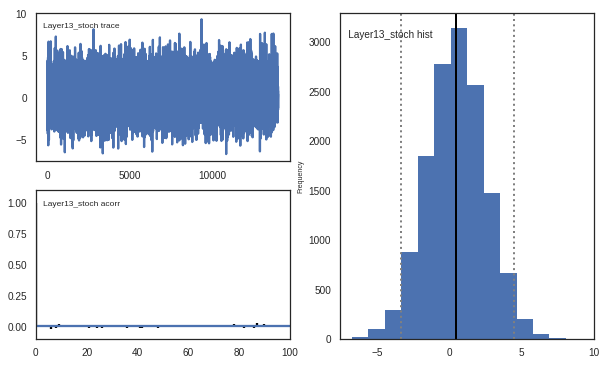

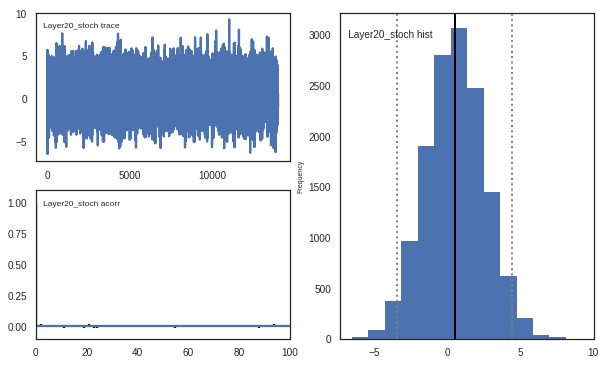

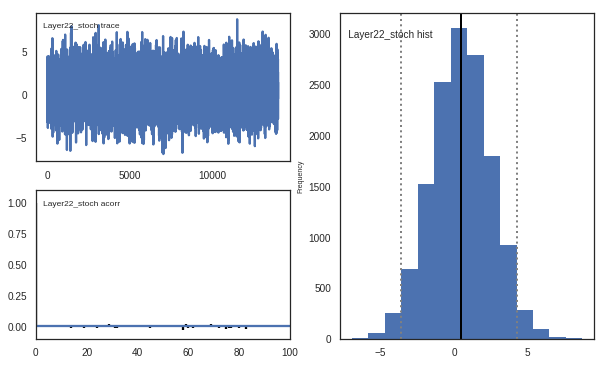

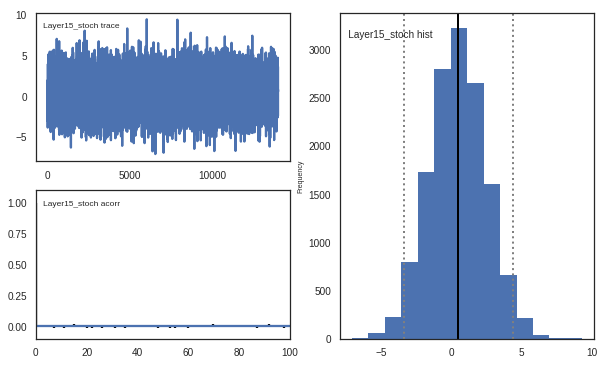

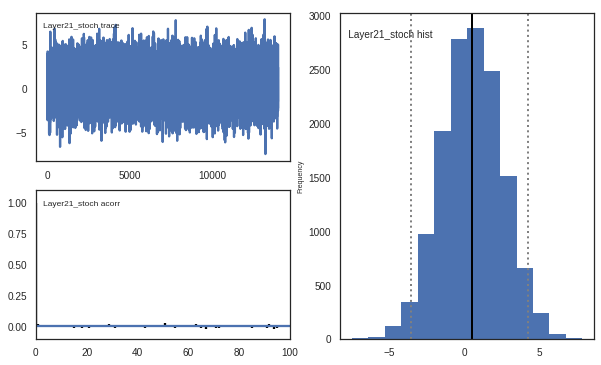

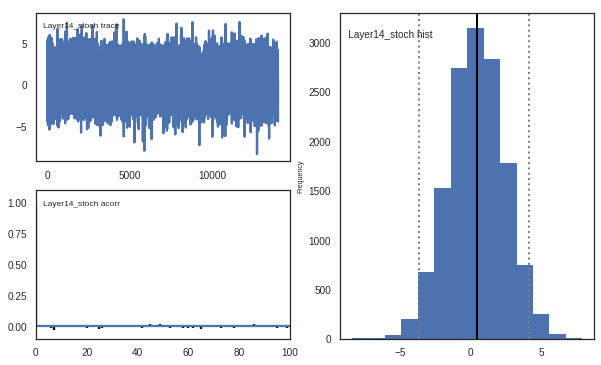

In [47]:
pymc.Matplot.plot(S)